In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
path = 'dataset-grades'
filename = 'qb_grades_technique.csv'

df = pd.read_csv(os.path.join(path, filename))
df.head(3)

,Player,Year,Race,Technique_Count,Release_Count,Release_Negative,Release_Positive,Release_Net,Mechanics_Count,Mechanics_Negative,Mechanics_Positive,Mechanics_Net,Footwork_Count,Footwork_Negative,Footwork_Positive,Footwork_Net,Accuracy_Count,Accuracy_Negative,Accuracy_Positive,Accuracy_Net
0,Chris Leak,2007,Non-White,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,John Beck,2007,White,4,2,0.0,1.0,1.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,2,0.0,1.0,1.0
2,Drew Stanton,2007,White,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,1.0,0.0,-1.0


In [3]:
""" GRADING SYSTEM

'Technique'
	'Release_Negative', 'Release_Positive', 
       'Mechanics_Negative', 'Mechanics_Positive',
       'Footwork_Negative', 'Footwork_Positive', 
       'Accuracy_Negative', 'Accuracy_Positive'
"""

" GRADING SYSTEM\n\n'Technique'\n\t'Release_Negative', 'Release_Positive', \n       'Mechanics_Negative', 'Mechanics_Positive',\n       'Footwork_Negative', 'Footwork_Positive', \n       'Accuracy_Negative', 'Accuracy_Positive'\n"

In [5]:
# Separate White and Non-White Players
w = df[df['Race'] == 'White']
nw = df[df['Race'] == 'Non-White']

In [6]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'Release_Net' : [df['Release_Net'].mean(), w['Release_Net'].mean(), nw['Release_Net'].mean()],
     'Mechanics_Net' : [df['Mechanics_Net'].mean(), w['Mechanics_Net'].mean(), nw['Mechanics_Net'].mean()],
     'Footwork_Net' : [df['Footwork_Net'].mean(), w['Footwork_Net'].mean(), nw['Footwork_Net'].mean()],
     'Accuracy_Net' : [df['Accuracy_Net'].mean(), w['Accuracy_Net'].mean(), nw['Accuracy_Net'].mean()]}

df_net = pd.DataFrame(d)
df_net = df_net[['Title', 'Release_Net', 'Mechanics_Net', 'Footwork_Net', 'Accuracy_Net']]
df_net

,Title,Release_Net,Mechanics_Net,Footwork_Net,Accuracy_Net
0,Average QB,0.373619,0.207715,0.255009,0.388317
1,Average White QB,0.340894,0.204127,0.265770,0.444576
2,Average Non-White QB,0.460509,0.217241,0.226437,0.238939


In [7]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'Release_Positive' : [df['Release_Positive'].mean(), w['Release_Positive'].mean(), nw['Release_Positive'].mean()],
     'Mechanics_Positive' : [df['Mechanics_Positive'].mean(), w['Mechanics_Positive'].mean(), nw['Mechanics_Positive'].mean()],
     'Footwork_Positive' : [df['Footwork_Positive'].mean(), w['Footwork_Positive'].mean(), nw['Footwork_Positive'].mean()],
     'Accuracy_Positive' : [df['Accuracy_Positive'].mean(), w['Accuracy_Positive'].mean(), nw['Accuracy_Positive'].mean()]}

df_pos = pd.DataFrame(d)
df_pos = df_pos[['Title', 'Release_Positive', 'Mechanics_Positive', 'Footwork_Positive', 'Accuracy_Positive']]
df_pos

,Title,Release_Positive,Mechanics_Positive,Footwork_Positive,Accuracy_Positive
0,Average QB,0.634923,0.384518,0.490712,0.682366
1,Average White QB,0.615252,0.371544,0.486781,0.719041
2,Average Non-White QB,0.687151,0.418966,0.501149,0.584987


In [8]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'Release_Negative' : [df['Release_Negative'].mean(), w['Release_Negative'].mean(), nw['Release_Negative'].mean()],
     'Mechanics_Negative' : [df['Mechanics_Negative'].mean(), w['Mechanics_Negative'].mean(), nw['Mechanics_Negative'].mean()],
     'Footwork_Negative' : [df['Footwork_Negative'].mean(), w['Footwork_Negative'].mean(), nw['Footwork_Negative'].mean()],
     'Accuracy_Negative' : [df['Accuracy_Negative'].mean(), w['Accuracy_Negative'].mean(), nw['Accuracy_Negative'].mean()]}

df_neg = pd.DataFrame(d)
df_neg = df_neg[['Title', 'Release_Negative', 'Mechanics_Negative', 'Footwork_Negative', 'Accuracy_Negative']]
df_neg

,Title,Release_Negative,Mechanics_Negative,Footwork_Negative,Accuracy_Negative
0,Average QB,0.261304,0.176803,0.235703,0.294049
1,Average White QB,0.274358,0.167417,0.221011,0.274465
2,Average Non-White QB,0.226642,0.201724,0.274713,0.346048


In [9]:
categories = ['Release', 'Mechanics', 'Footwork', 'Accuracy']

In [11]:
# Calculate angles for radar chart
offset = np.pi/4
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [12]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, categories, color='#003594', title='', title_flag=False):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=40)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add Title
    ax.text(np.pi/2, 1.4, player_data[0], ha='center', va='center', size=50, color=color)
    
    if title_flag:
        ax.text(np.pi/2, 1.70, title, ha='center', va='center', size=55)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

def get_row_data(data, row):
    return np.asarray(data[data['Title'] == row])[0]

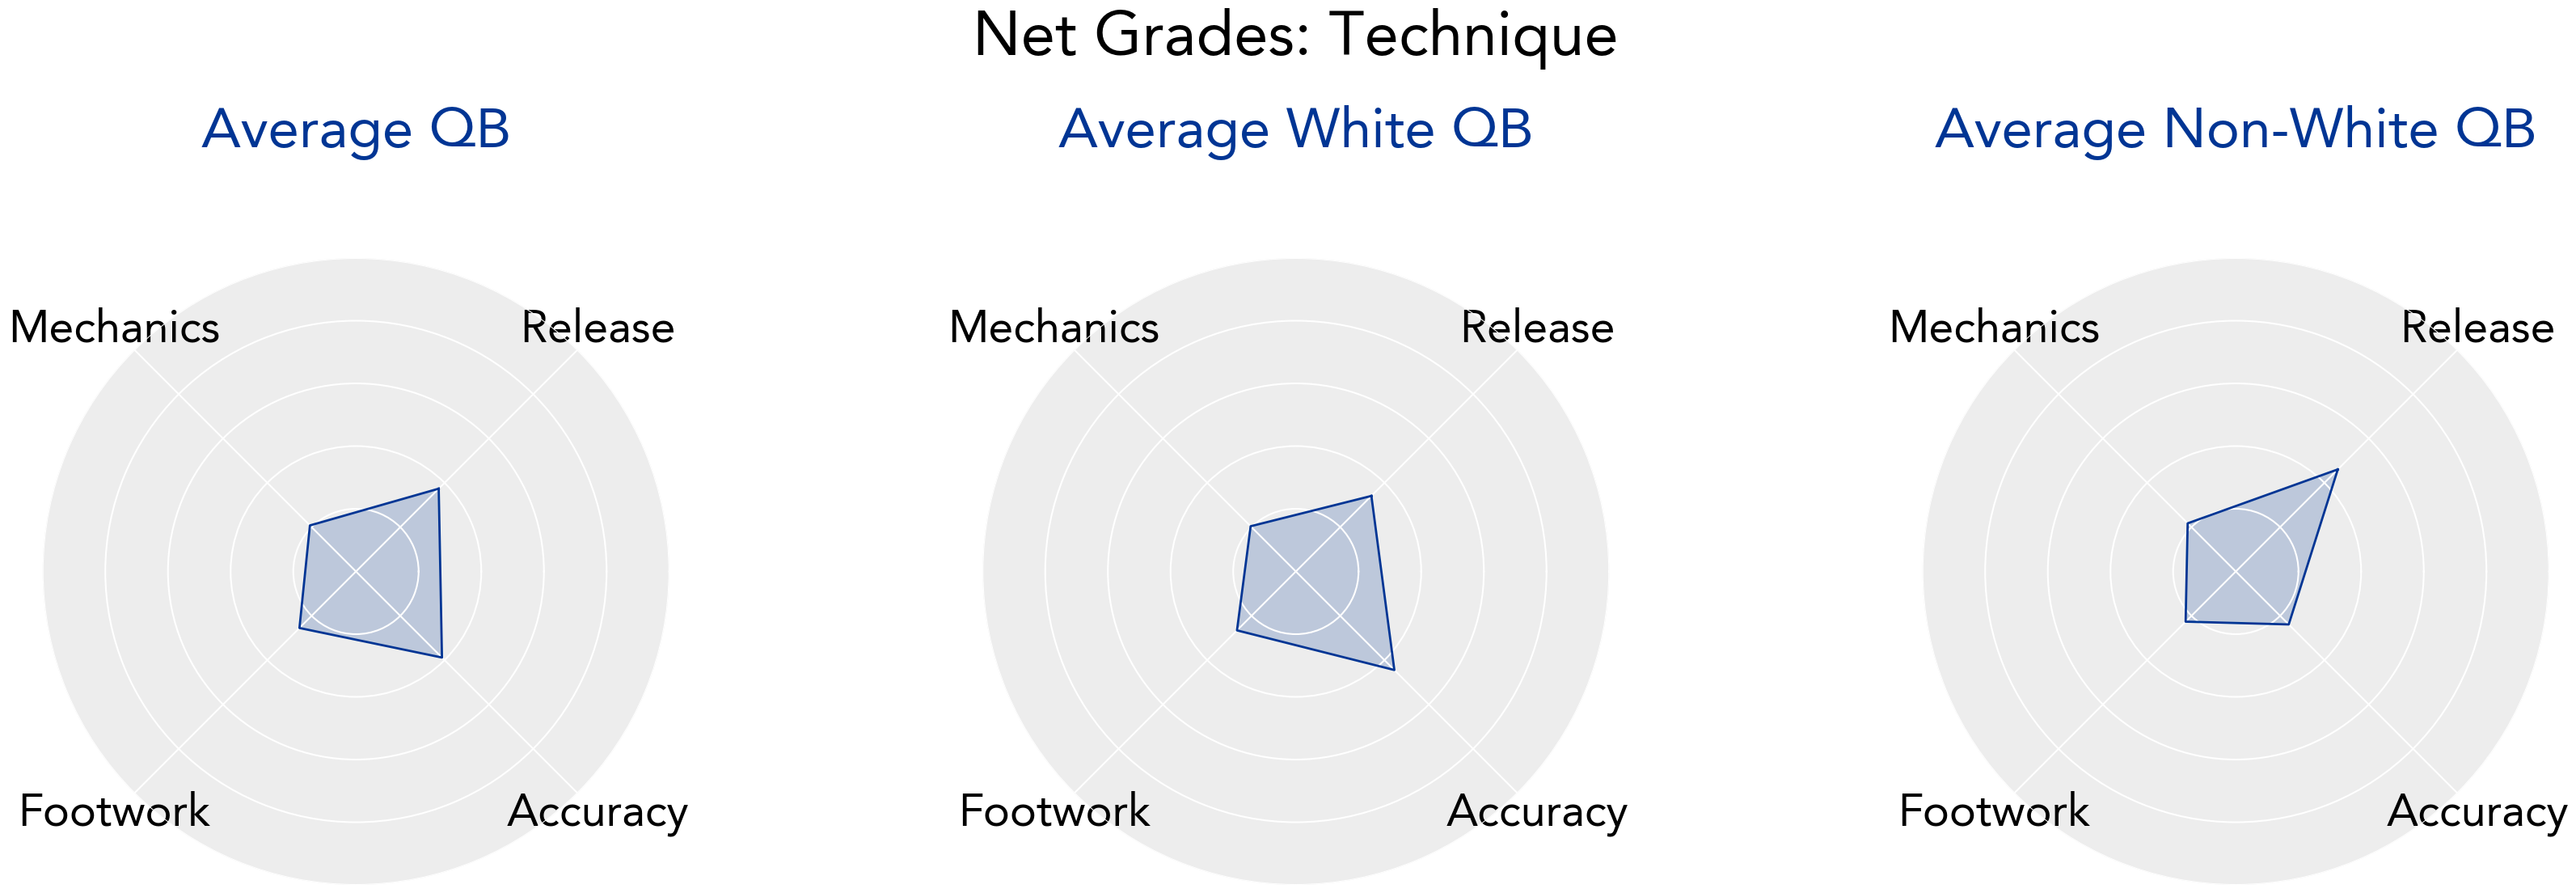

In [13]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_net, 'Average QB')
w_data = get_row_data(df_net, 'Average White QB')
nw_data = get_row_data(df_net, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories)
ax2 = create_radar_chart(ax2, angles, w_data, categories, title='Net Grades: Technique', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories)

plt.show()

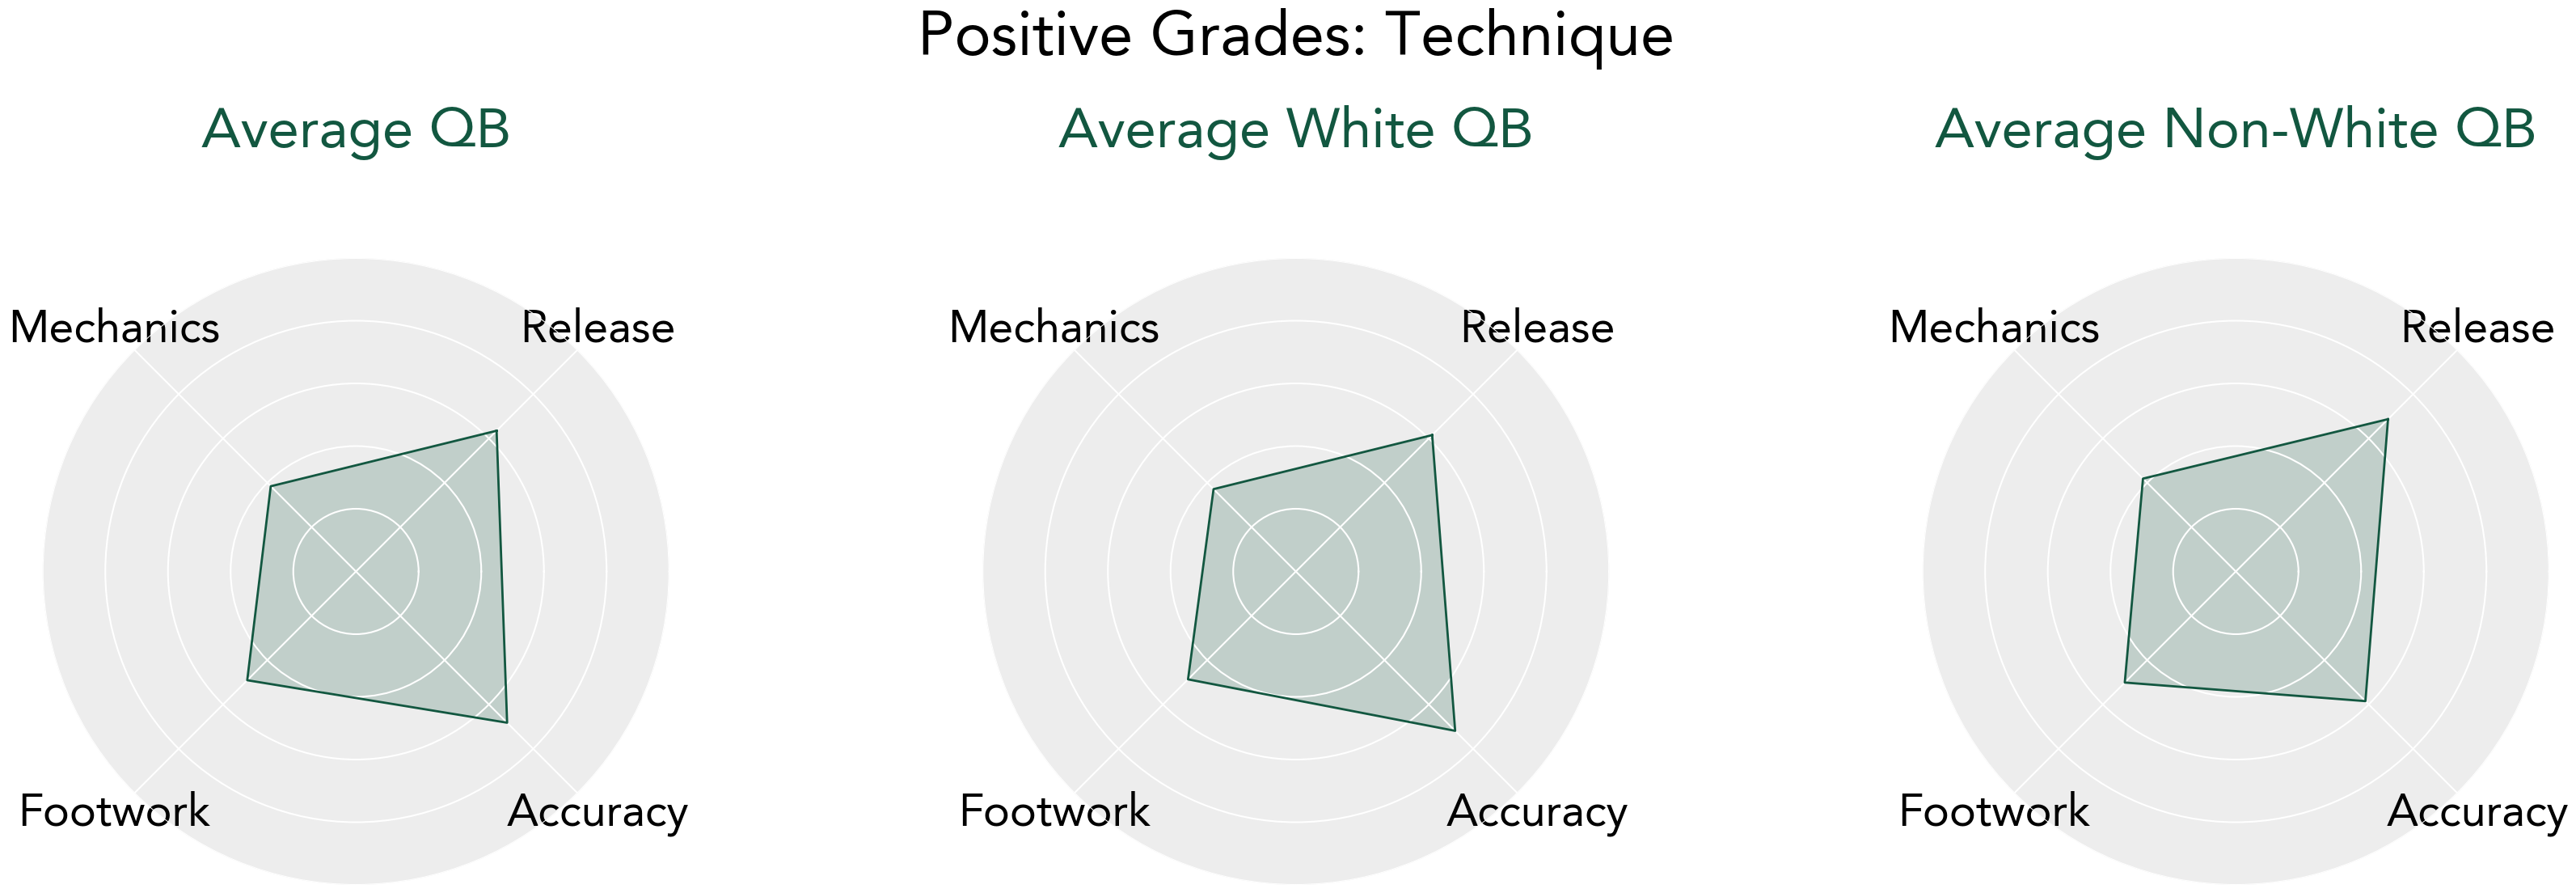

In [14]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_pos, 'Average QB')
w_data = get_row_data(df_pos, 'Average White QB')
nw_data = get_row_data(df_pos, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories, color='#125740')
ax2 = create_radar_chart(ax2, angles, w_data, categories, color='#125740', title='Positive Grades: Technique', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories, color='#125740')

plt.show()

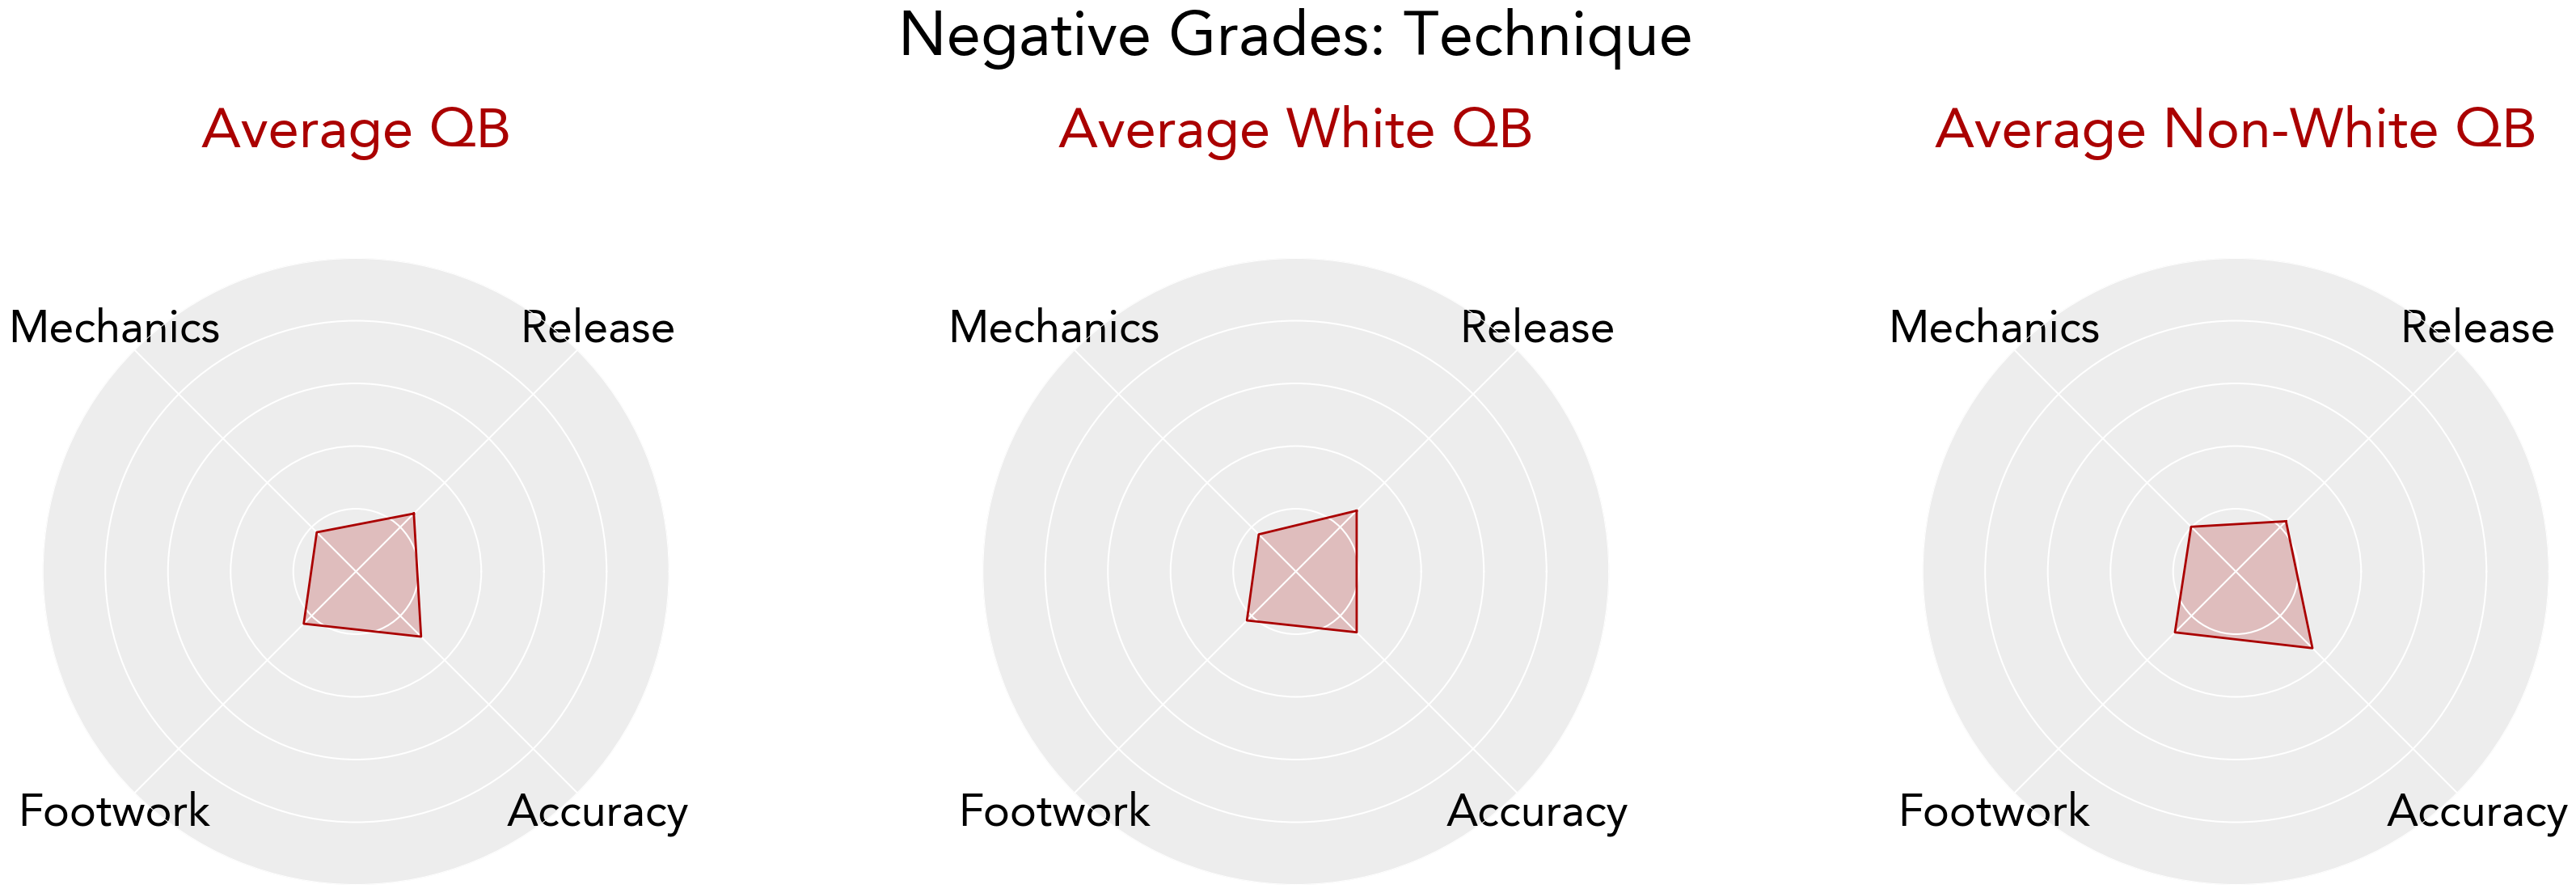

In [15]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_neg, 'Average QB')
w_data = get_row_data(df_neg, 'Average White QB')
nw_data = get_row_data(df_neg, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories, color='#aa0000')
ax2 = create_radar_chart(ax2, angles, w_data, categories, color='#aa0000', title='Negative Grades: Technique', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories, color='#aa0000')

plt.show()